# Project: Telco Churn Rate

#### Find drivers for customer churn at Telco. Why are customers churning?


###### Hypothesis: Customer who are churning are ones with mail in check

###### Null: mail-in check does not have any relationship with customer churning

###### Alternative: Mail-in check customer have higher chance of churning

#### Construct a ML classification model that accurately predicts customer churn

## Import

In [54]:
import os 
import warnings
warnings.filterwarnings("ignore") #this will disregard any unnecessary warning Python may throw at me

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
#this was needed at the plot stage for visualize distribution
from sklearn.model_selection import train_test_split
#this was done later in the prep stage to split data
from sklearn.impute import SimpleImputer
#this was done at the end of the prep stage to import imputer

## Acquire

Where and when you acquire your data.
How did I get teh data.
When did i get the data.
Size of data.
What does each observation represent?
What does each column represent?

#### I have acquire the JOINED telco data by exporting from MySQL Workbench. 


SELECT *
FROM customer_details
JOIN customer_contracts on customer_contracts.customer_id = customer_details.customer_id
JOIN customer_churn on customer_churn.customer_id = customer_contracts.customer_id
JOIN customer_payments on customer_payments.customer_id= customer_churn.customer_id
JOIN customer_signups on customer_signups.customer_id =customer_payments.customer_id
JOIN customer_subscriptions on customer_subscriptions.customer_id = customer_details.customer_id
JOIN internet_service_types on internet_service_types.internet_service_type_id = customer_subscriptions.internet_service_type_id
JOIN payment_types on payment_types.payment_type_id = customer_payments.payment_type_id
JOIN contract_types on contract_types.contract_type_id = customer_contracts.contract_type_id;

#### I uploaded telco data into Jupyter Notebook
#### and read it with the command below

In [18]:
#put telco file in the same repository
#importing telco .CSV file using acquisition method 
url = 'telco.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [19]:
#size of the data
df.shape

(7043, 25)

In [20]:
df.columns

Index(['Unnamed: 0', 'payment_type_id', 'internet_service_type_id',
       'contract_type_id', 'customer_id', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'monthly_charges', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [21]:
df.columns.to_list()

['Unnamed: 0',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

## Prepare

List steps taken to clean your data here. In particular call out how you handle null values and outliers in detail. You must do this even if you do not do anything or do not encounter any. Anytime there is potential to make changes to the data you must be upfront about the changes you make or do not make.

In [22]:
#printing unique values for each of categorical variables using the for loop
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col} has {df[col].nunique()} unique values: {df[col].unique()}')


customer_id has 7043 unique values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
gender has 2 unique values: ['Female' 'Male']
partner has 2 unique values: ['Yes' 'No']
dependents has 2 unique values: ['Yes' 'No']
phone_service has 2 unique values: ['Yes' 'No']
multiple_lines has 3 unique values: ['No' 'Yes' 'No phone service']
online_security has 3 unique values: ['No' 'Yes' 'No internet service']
online_backup has 3 unique values: ['Yes' 'No' 'No internet service']
device_protection has 3 unique values: ['No' 'Yes' 'No internet service']
tech_support has 3 unique values: ['Yes' 'No' 'No internet service']
streaming_tv has 3 unique values: ['Yes' 'No' 'No internet service']
streaming_movies has 3 unique values: ['No' 'Yes' 'No internet service']
paperless_billing has 2 unique values: ['Yes' 'No']
total_charges has 6531 unique values: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
churn has 2 unique values: ['No' 'Yes']
contract_type h

In [23]:
df.isnull().sum()  #there are zero null so i do not need to consider dropping anything

Unnamed: 0                  0
payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [24]:
#i am commiting to drop useless and redundant datas for the sake of humanity
df = df.drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id',])

In [25]:
#turning the above into a function this will be used in exploration

def drop_columns(df):
    columns_to_drop = ['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id']
    df = df.drop(columns=[columns_to_drop])
    return df
#i have done this early in the pipeline to get rid of those pesky redundacy


In [26]:
df.dtypes # i have ensured the column dropped and list their data types

gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges             object
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [27]:
unique_values = df['total_charges'].unique()
print(unique_values)
#i dont see anything out of the norm but..

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


# Come back to this to change the space in total_charges into a underscore

In [28]:
#note that the total_charges is read as an object
#this mean that some values could be Null, non-numeric, or Dollar sign, or a space
# we need to get rid of these

df['total_charges'].str.replace(',', '')
pd.to_numeric(df['total_charges'], errors='coerce')

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [29]:
# i need to identify columns with object incase i have to change it into integer for pandas during machine learning phase
df.select_dtypes(include='object').columns.to_list()

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [14]:
#i need to compute for the range of each numeric variables to understand Data Distribution and visualization
#i have identied three columns with numeric values
numeric_columns = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_columns.append(col)

print(numeric_columns)

['senior_citizen', 'tenure', 'monthly_charges']


In [15]:
#computing the range for each columns
df[['senior_citizen', 'tenure', 'monthly_charges']].describe().T
#below are the statistic description for each of the variables

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [30]:
df.describe()   #this is use to view summary stat for numeric columns

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


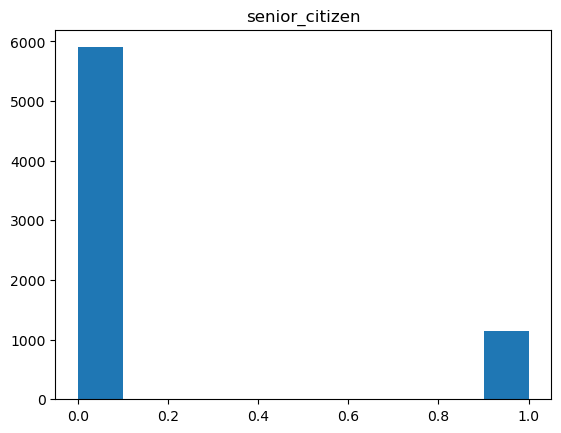

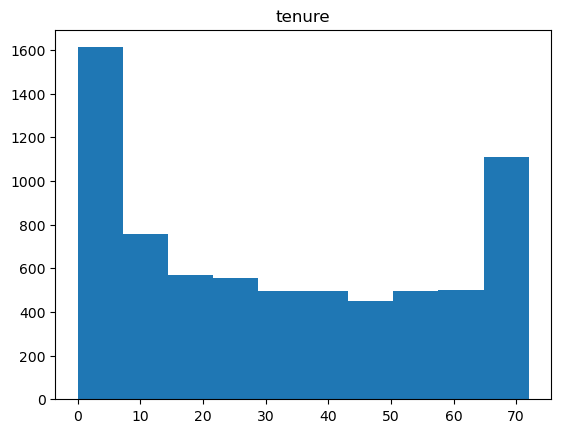

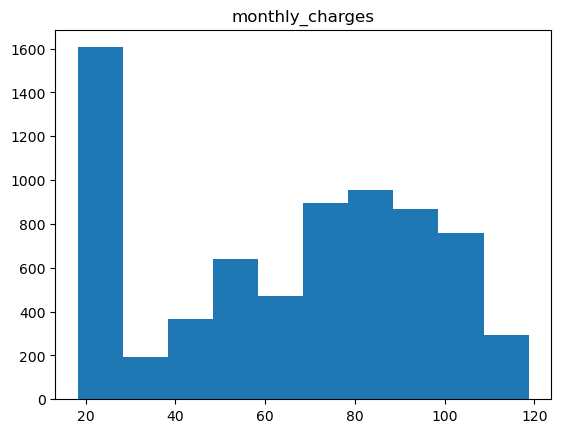

In [31]:
#this function is to plot all columns with numeric values
#since float64 and int64 are not object, i was able to use that to create a plot
num_cols = df.columns[[df[col].dtype != 'object' for col in df.columns]]

for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [38]:
# Use .describe with non object columns with the normalized value count 
# i did this to see the distribution of unique values
# and to understand the frequency and proportion of different values in the numerical columns

obj_cols = df.columns[[df[col].dtype != 'O' for col in df.columns]]  #'O' is for object
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')


0    5901
1    1142
Name: senior_citizen, dtype: int64
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64
----------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64
----------------------
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64
20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
            ...   
116.55    0.000142
106.85    0.000142
68.55     0.000142
108.80    0.000142
67.85     0.000142
Name: monthly_charges, Length: 1585, dtype: float64
----------------------


The normalized value counts show that proportion of value 0 is about 83.79%, and the value 1 is about 0.1621%

The tenure data shows 73 different value of months from 0 to 72.
the normalized value counts show proportion of each months in relation to its non-null values

there are 1585 unique values in monthly_charges column. this data show the proportion of the 1585 values relative to total number of non-null values



In [33]:
# Use .describe with object columns with the normalized value count 
# i did this to see the distribution of unique values
# and to understand the frequency and proportion of different values in the categorical columns

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]  #'O' is for object
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
----------------------
Yes    6361
No      682
Name: phone_service, dtype: int64
Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64
----------------------
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64
----------------------
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     0.496663
Yes            

In this dataset I can see that gender has two values of male and female. pretty even out

more customers does not have dependents at 70%

about 90% have phone service with us

about 42 % have multiline and 48% with no multiline

about 49% does not have online security

about 43% does not have online backup

about 43% does not have device protection

about 39% does not have tv and 38% does

about 39% does not have streaming movies, and 38% does

about 59% have paperless billing and 40% does not

churn is abotu 26% and 73% not churn

majority have fiber optic

and majority have electronic check



## next step is to split the data




In [47]:
#i want 20% test, 80% train-validate
#of the 80% train_validate, i have 30% validate, and 70% train
seed = 42 #this is a random state (number generator) so anyone can take my code and produce the same result 
train, test = train_test_split(df, test_size=.2, random_state=seed, stratify=df.churn) 
#stratifying the churn will maintain the same class distribution in both training and test dataset
#after i run this code, i will have two separate datasets: train and test, subset of df. 


train, validate = train_test_split(train, test_size=.3, random_state=seed, stratify=train.churn)
#this code will further split the train subset into train and validate with 30% validate and 70% train

In [48]:
# after the split i want to validate my train so that my model perform well to unseen data
# validate will prevent overfitting, be able to experience different hyperparameter, 
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 20)
validate -> (1691, 20)
test -> (1409, 20)


the train set is used for training, the validation set help with tuning, and the test set assesses the model's final performance. 

the train set have a bigger shape compare the validate and test, and all subsets contain the same number of columns

# Impute missing values


I want to impute missing values to fill in the gaps with estimated or predicted values. 
I can impute using statistical measure, or a constant value.
I have to becareful not to impute values in a way that create bias in my data

In [50]:
train.info()  #this is the dataset after we have splitted our data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6377
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 3943 non-null   object 
 1   senior_citizen         3943 non-null   int64  
 2   partner                3943 non-null   object 
 3   dependents             3943 non-null   object 
 4   tenure                 3943 non-null   int64  
 5   phone_service          3943 non-null   object 
 6   multiple_lines         3943 non-null   object 
 7   online_security        3943 non-null   object 
 8   online_backup          3943 non-null   object 
 9   device_protection      3943 non-null   object 
 10  tech_support           3943 non-null   object 
 11  streaming_tv           3943 non-null   object 
 12  streaming_movies       3943 non-null   object 
 13  paperless_billing      3943 non-null   object 
 14  monthly_charges        3943 non-null   float64
 15  t

In [61]:
#creating a SimpleImputer object to store impute variables, and the impute will replace missing values with a constant unknown
imputer = SimpleImputer(fill_value= 'unknown', strategy= 'constant')
#if i were to use the 'most_frequent' strategy, it would fill in any null values with the most dominant class value and that will introduce bias into the data
#by filling in unknown or missing value, i can prevent any assumptions about the the data

In [62]:
#fitting the imputer to the columns of train. 
imputer.fit(train[['churn']])

SimpleImputer(fill_value='unknown', strategy='constant')

In [58]:
# I will need to applyi the same impute to all the subsets of the data
train[['churn']] = imputer.transform(train[['churn']])

validate[['churn']] = imputer.transform(validate[['churn']])

test[['churn']] = imputer.transform(test[['churn']])


In [63]:
train.churn.value_counts(dropna=False)  #I should have 3943 total value counts in train subset

No     2897
Yes    1046
Name: churn, dtype: int64

In [64]:
#creating a function of impute to run through all the step above when i pass the train, validate, and test DataFrames as my argument
def impute_mode(train, validate, test):
    imputer = SimpleImputer(fill_value= 'unknown', strategy='constant')
    train[['churn']] = imputer.fit_transform(train[['churn']])
    validate[['churn']] = imputer.transform(validate[['churn']])
    test[['churn']] = imputer.transform(test[['churn']])
    return train, validate, test



# I should be making function  of clean data and split data already for preparation

# This is when I should test the function to 